<a href="https://colab.research.google.com/github/Abi0p/Predicting_Electiric-_vehicle_adoption_using_Machin_learnig_and-_python-/blob/main/Predicting_Electric_Vehicle_Adoption_On_Tesla_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [31]:
data = pd.read_excel('Tesla_EV_data.xlsx')

In [32]:
data.head()

,Region,Year,Total_EV_Sales,Government_Incentives,Charging_Stations_per_1000_EVs,Average_EV_Price,Average_Income,Fuel_Prices,Environmental_Awareness_Score,Urbanization_Rate,Population_Density,Public_Transport_Quality,Electricity_Prices,CO2_Emissions,Education_Level
0,North America,2022.0,22755.0,Low,8.427531,49715.904675,64472.156325,2.707856,70.399711,76.513942,583.980200,High,NaN,4.429306,Medium
1,Europe,2022.0,28277.0,Medium,NaN,46376.825698,49647.725535,4.805565,87.821015,70.674509,NaN,High,0.159577,NaN,Low
2,North America,2021.0,20339.0,High,22.031057,30185.418847,68296.856014,3.983740,85.341651,79.059750,1254.480899,Medium,0.136757,4.651005,Medium
3,North America,2020.0,7866.0,Low,11.937345,39279.734570,45953.925632,3.252834,74.831065,70.695751,1298.021915,High,0.108969,4.568185,Low
4,NaN,2023.0,25390.0,Medium,14.907289,32006.072316,40428.292294,2.135705,70.717351,69.602052,902.252674,Medium,0.159423,4.280396,NaN


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Region                          89951 non-null  object 
 1   Year                            89881 non-null  float64
 2   Total_EV_Sales                  89930 non-null  float64
 3   Government_Incentives           90008 non-null  object 
 4   Charging_Stations_per_1000_EVs  90013 non-null  float64
 5   Average_EV_Price                90086 non-null  float64
 6   Average_Income                  89961 non-null  float64
 7   Fuel_Prices                     89945 non-null  float64
 8   Environmental_Awareness_Score   90109 non-null  float64
 9   Urbanization_Rate               90122 non-null  float64
 10  Population_Density              90023 non-null  float64
 11  Public_Transport_Quality        90044 non-null  object 
 12  Electricity_Prices             

In [34]:
data.isnull().sum()

,0
Region,10049
Year,10119
Total_EV_Sales,10070
Government_Incentives,9992
Charging_Stations_per_1000_EVs,9987
Average_EV_Price,9914
Average_Income,10039
Fuel_Prices,10055
Environmental_Awareness_Score,9891
Urbanization_Rate,9878


In [35]:
numerical_columns = data.select_dtypes(include=['number']).columns
data[numerical_columns]=data[numerical_columns].fillna(data[numerical_columns].mean())
categorical_column = data.select_dtypes(include=['object']).columns
data[categorical_column]=data[categorical_column].fillna(data[categorical_column].mode().iloc[0])

In [36]:
data.isnull().sum()

,0
Region,0
Year,0
Total_EV_Sales,0
Government_Incentives,0
Charging_Stations_per_1000_EVs,0
Average_EV_Price,0
Average_Income,0
Fuel_Prices,0
Environmental_Awareness_Score,0
Urbanization_Rate,0


In [37]:
data.shape

(100000, 15)

In [38]:
data.duplicated().sum()

0

In [39]:
data.describe()

,Year,Total_EV_Sales,Charging_Stations_per_1000_EVs,Average_EV_Price,Average_Income,Fuel_Prices,Environmental_Awareness_Score,Urbanization_Rate,Population_Density,Electricity_Prices,CO2_Emissions
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2021.496434,17479.312209,17.489144,37516.355998,55010.572411,3.500710,75.031274,74.995494,1252.133536,0.139880,5.001784
std,1.060859,6835.623416,6.847951,6852.550174,8226.009565,0.820658,8.194169,8.195275,409.894549,0.032884,0.546939
min,2020.000000,5000.000000,5.000259,25000.309423,40000.472456,2.000018,60.000262,60.000490,500.004066,0.080002,4.000001
25%,2021.000000,11922.750000,11.931891,31975.614219,48301.096811,2.836752,68.398108,68.349657,919.961735,0.113132,4.558797
50%,2021.496434,17479.312209,17.489144,37516.355998,55010.572411,3.500710,75.031274,74.995494,1252.133536,0.139880,5.001784
75%,2022.000000,23025.250000,23.050967,43056.110977,61700.516488,4.163488,81.674155,81.626308,1585.375208,0.166566,5.445033
max,2023.000000,29999.000000,29.999980,49999.950412,69999.557000,4.999951,89.999431,89.999813,1999.993887,0.200000,5.999969


In [40]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df

data_cleaned = data.copy()

#  the function to each numeric column to handle outliers
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns  # Assuming 'data_cleaned' is already cleaned for non-numeric issues
for col in numeric_columns:
    data_cleaned = remove_outliers_iqr(data_cleaned, col)
print(f"Data shape after outlier removal: {data_cleaned.shape}")

Data shape after outlier removal: (100000, 15)


In [41]:
from sklearn.preprocessing import StandardScaler

# Initialize 'data_cleaned' from the previous cleaning step
data_cleaned = data.copy()  # Ensure you're working with the cleaned dataset

# Identify numerical columns but exclude the 'Attrition' column
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the numeric columns and transform the data
data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])


print(f"Mean of each numeric column after standardization:\n{data_cleaned[numeric_columns].mean()}")
print(f"Standard deviation of each numeric column after standardization :\n{data_cleaned[numeric_columns].std()}")




Mean of each numeric column after standardization:
Year                              1.436507e-13
Total_EV_Sales                    5.715606e-16
Charging_Stations_per_1000_EVs   -3.171685e-16
Average_EV_Price                  3.685940e-16
Average_Income                    5.355183e-16
Fuel_Prices                       8.238388e-16
Environmental_Awareness_Score     1.195133e-16
Urbanization_Rate                -1.212008e-15
Population_Density                4.023804e-16
Electricity_Prices               -1.215739e-16
CO2_Emissions                    -2.614797e-17
dtype: float64
Standard deviation of each numeric column after standardization :
Year                              1.000005
Total_EV_Sales                    1.000005
Charging_Stations_per_1000_EVs    1.000005
Average_EV_Price                  1.000005
Average_Income                    1.000005
Fuel_Prices                       1.000005
Environmental_Awareness_Score     1.000005
Urbanization_Rate                 1.000005
Populat

In [42]:
data.describe()

,Year,Total_EV_Sales,Charging_Stations_per_1000_EVs,Average_EV_Price,Average_Income,Fuel_Prices,Environmental_Awareness_Score,Urbanization_Rate,Population_Density,Electricity_Prices,CO2_Emissions
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2021.496434,17479.312209,17.489144,37516.355998,55010.572411,3.500710,75.031274,74.995494,1252.133536,0.139880,5.001784
std,1.060859,6835.623416,6.847951,6852.550174,8226.009565,0.820658,8.194169,8.195275,409.894549,0.032884,0.546939
min,2020.000000,5000.000000,5.000259,25000.309423,40000.472456,2.000018,60.000262,60.000490,500.004066,0.080002,4.000001
25%,2021.000000,11922.750000,11.931891,31975.614219,48301.096811,2.836752,68.398108,68.349657,919.961735,0.113132,4.558797
50%,2021.496434,17479.312209,17.489144,37516.355998,55010.572411,3.500710,75.031274,74.995494,1252.133536,0.139880,5.001784
75%,2022.000000,23025.250000,23.050967,43056.110977,61700.516488,4.163488,81.674155,81.626308,1585.375208,0.166566,5.445033
max,2023.000000,29999.000000,29.999980,49999.950412,69999.557000,4.999951,89.999431,89.999813,1999.993887,0.200000,5.999969


In [43]:
correlation_matrix = data[numeric_columns].corr()
print(correlation_matrix)

                                    Year  Total_EV_Sales  \
Year                            1.000000       -0.001509   
Total_EV_Sales                 -0.001509        1.000000   
Charging_Stations_per_1000_EVs -0.001523       -0.001194   
Average_EV_Price               -0.000994        0.003608   
Average_Income                 -0.002946        0.003424   
Fuel_Prices                     0.000114        0.003534   
Environmental_Awareness_Score   0.006454        0.007486   
Urbanization_Rate               0.004663       -0.002015   
Population_Density             -0.004688       -0.001182   
Electricity_Prices              0.007048       -0.001003   
CO2_Emissions                   0.000562        0.004843   

                                Charging_Stations_per_1000_EVs  \
Year                                                 -0.001523   
Total_EV_Sales                                       -0.001194   
Charging_Stations_per_1000_EVs                        1.000000   
Average_EV_Pric

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

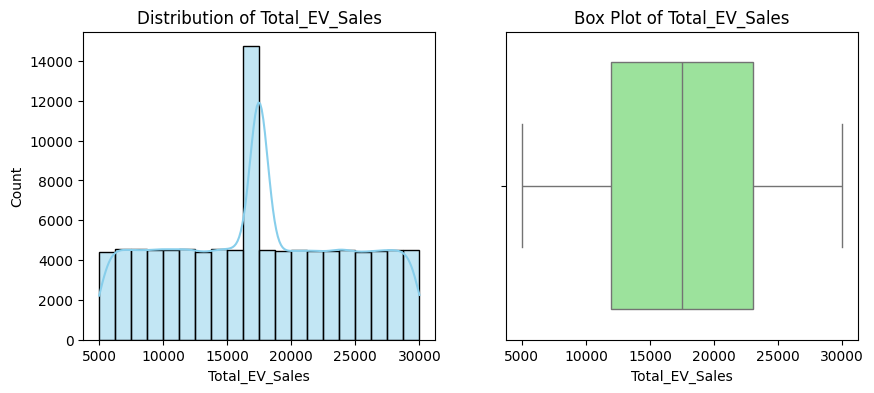

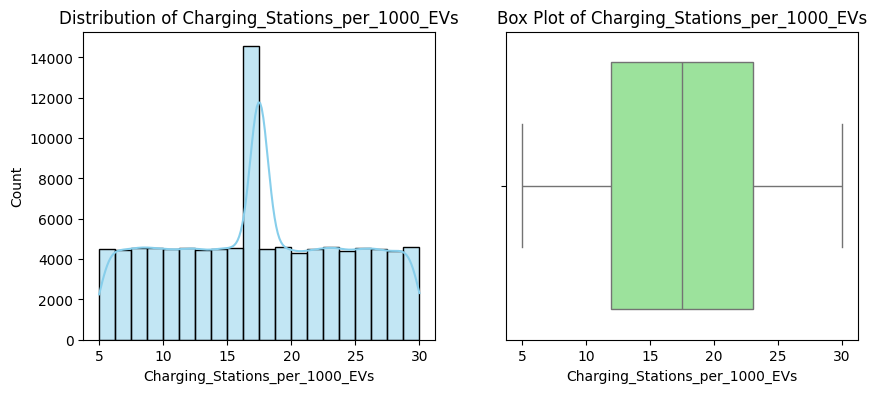

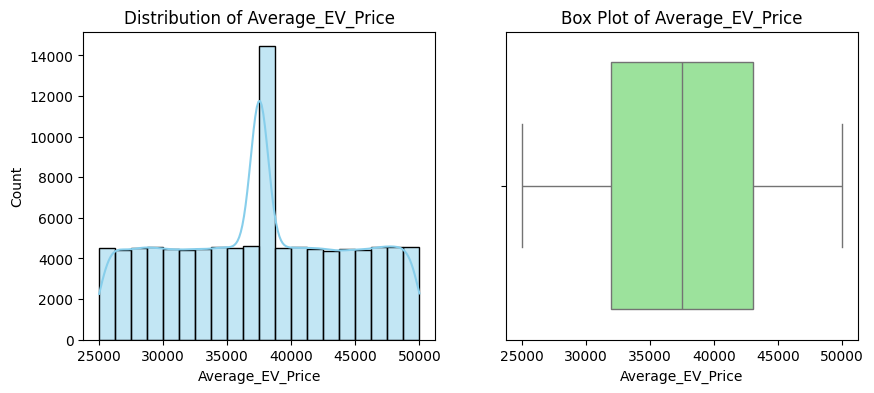

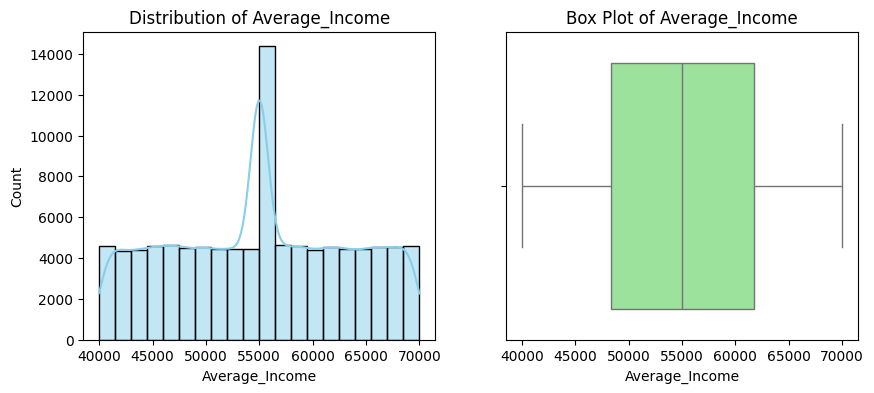

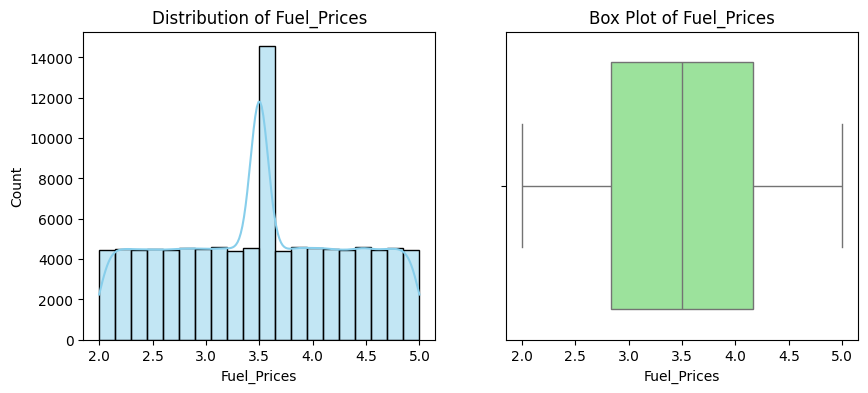

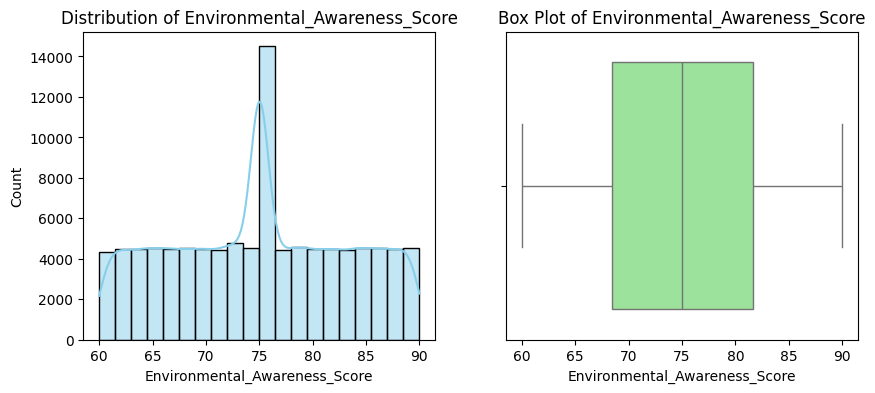

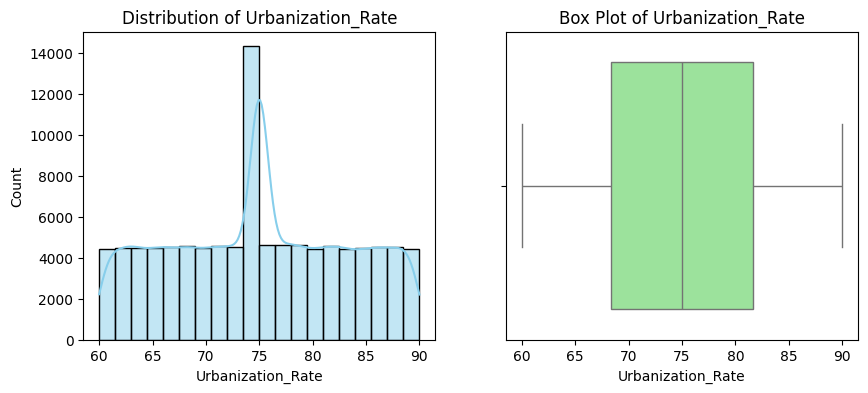

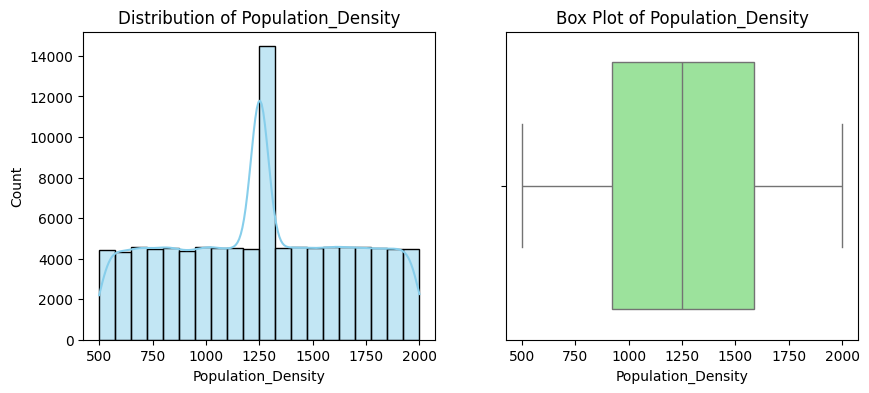

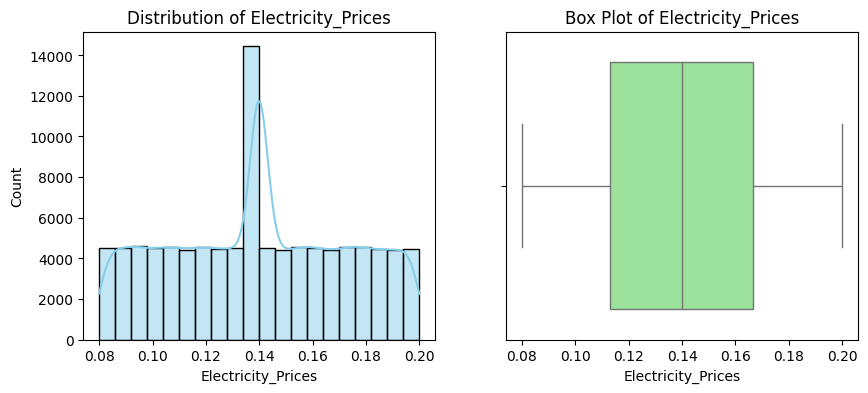

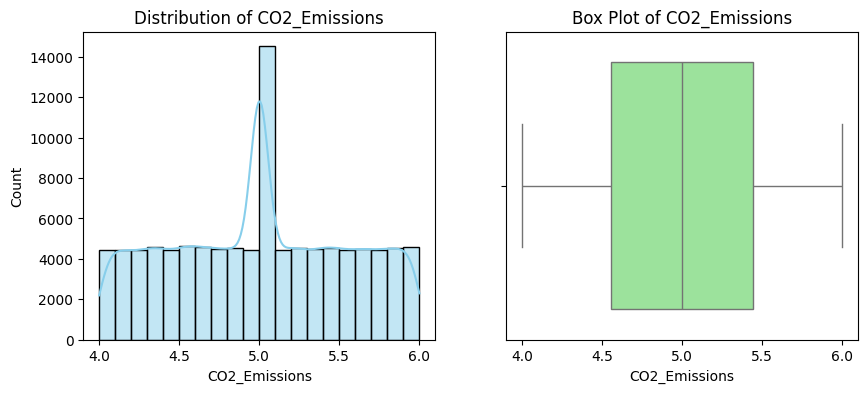

In [45]:
# List of numeric columns to visualize
numeric_columns = ['Total_EV_Sales', 'Charging_Stations_per_1000_EVs', 'Average_EV_Price',
                   'Average_Income', 'Fuel_Prices', 'Environmental_Awareness_Score',
                   'Urbanization_Rate', 'Population_Density', 'Electricity_Prices', 'CO2_Emissions']

# Plot histograms and boxplots
for col in numeric_columns:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')

    plt.show()


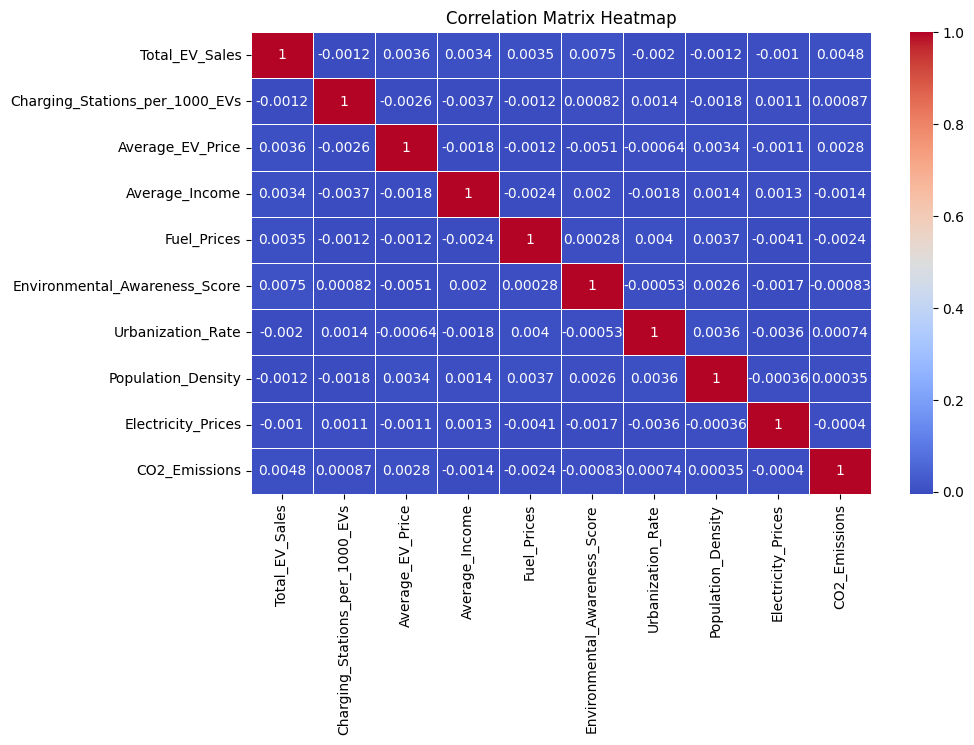

In [46]:
# Calculate the correlation matrix
corr_matrix = data[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



In [47]:
data.columns

Index(['Region', 'Year', 'Total_EV_Sales', 'Government_Incentives',
       'Charging_Stations_per_1000_EVs', 'Average_EV_Price', 'Average_Income',
       'Fuel_Prices', 'Environmental_Awareness_Score', 'Urbanization_Rate',
       'Population_Density', 'Public_Transport_Quality', 'Electricity_Prices',
       'CO2_Emissions', 'Education_Level'],
      dtype='object')

In [48]:
data['Region'].value_counts()


,count
Region,
Asia,40215
Europe,29988
North America,29797


In [49]:
data['Public_Transport_Quality'].value_counts()


,count
Public_Transport_Quality,
Medium,40050
High,30075
Low,29875


In [50]:
data['Government_Incentives'].value_counts()

,count
Government_Incentives,
Medium,40237
Low,30028
High,29735


In [51]:
data['Education_Level'].value_counts()

,count
Education_Level,
High,40126
Medium,30047
Low,29827


In [52]:
#encode the categorical columns which ar ordinal , use labelEncoding
#apply label encoder to df_categorical
from sklearn.preprocessing import LabelEncoder
encoding_cols=['Region','Public_Transport_Quality','Education_Level','Government_Incentives']
label_encoders ={}
for col in encoding_cols:
    label_encoders[col]=LabelEncoder()
    data[col]=label_encoders[col].fit_transform(data[col])

In [53]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
data.head()

,Region,Year,Total_EV_Sales,Government_Incentives,Charging_Stations_per_1000_EVs,Average_EV_Price,Average_Income,Fuel_Prices,Environmental_Awareness_Score,Urbanization_Rate,Population_Density,Public_Transport_Quality,Electricity_Prices,CO2_Emissions,Education_Level
0,2,2022.0,22755.0,1,8.427531,49715.904675,64472.156325,2.707856,70.399711,76.513942,583.980200,0,0.139880,4.429306,2
1,1,2022.0,28277.0,2,17.489144,46376.825698,49647.725535,4.805565,87.821015,70.674509,1252.133536,0,0.159577,5.001784,1
2,2,2021.0,20339.0,0,22.031057,30185.418847,68296.856014,3.983740,85.341651,79.059750,1254.480899,2,0.136757,4.651005,2
3,2,2020.0,7866.0,1,11.937345,39279.734570,45953.925632,3.252834,74.831065,70.695751,1298.021915,0,0.108969,4.568185,1
4,0,2023.0,25390.0,2,14.907289,32006.072316,40428.292294,2.135705,70.717351,69.602052,902.252674,2,0.159423,4.280396,0


In [67]:
# Machine learning : Splitting the data into Traning and Testing Sample
X = data.drop('Total_EV_Sales',axis=1)
Y = data['Total_EV_Sales'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [61]:
print (X_train.shape)
print (X_test.shape)
print (y_test.shape)
print (y_train.shape)

(70000, 28)
(30000, 28)
(30000,)
(70000,)


In [68]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [69]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-Squared: {r2}')


Mean Squared Error (MSE): 2391528.5165395355
R-Squared: 0.948523061534557


In [45]:
# Coefficients interpretation
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False)


,Coefficient
Environmental_Awareness_Score,42.914694
Government_Incentives,37.528932
Population_Density,32.842931
Education_Level,16.566035
CO2_Emissions,16.389559
Average_EV_Price,14.252717
Fuel_Prices,14.173546
Year,7.243022
Electricity_Prices,-0.465853
Urbanization_Rate,-5.937907
